<a href="https://colab.research.google.com/github/dhenifferraujo/Machine-Learning/blob/main/Regress%C3%A3o_Exerc%C3%ADcioB%C3%A1sico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Disciplina:** SCC5871/MAI5025 –Aprendizado de Máquina – Pós-Graduação – 1º.
 Sem /2021

**Prof(a):** Roseli Aparecida Francelin Romero

**Monitor:** Guilherme V. Nardari




# **Exercício 01 - Regressão**

In [ ]:
# Use seaborn para pairplot
!pip install -q seaborn

**Questão 01:** Carregue os dados em uma estrutura Pandas DataFrame. Utilize um regressor linear nesse conjunto de dados e calcule seu erro quadrático médio (mean squared error - MSE)

In [ ]:

import os
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np

In [ ]:
#carregando dados
#df = pd.read_csv('dados.txt', sep=" ",header=None)
df = pd.read_csv('dados.txt')
print(df)

         VL     VM     VP      M   VMVL  ...    Vv   DirV    MHE    MLR   CO
0    1849.0  209.0   62.0  245.0  11.75  ...  1.15  115.0   4.01  30.18  7.1
1     580.0   48.0   88.0  137.0   8.60  ...  1.40   20.0  17.69  13.70  5.9
2    1438.0  207.0  108.0  386.0  11.80  ...  0.60  170.0   3.49  38.37  9.6
3     651.0   58.0   23.0   46.0   9.60  ...  0.00  159.0   5.33  32.97  7.4
4     623.0   55.0   82.0  141.0   5.10  ...  0.70   27.0  17.69  13.70  3.7
..      ...    ...    ...    ...    ...  ...   ...    ...    ...    ...  ...
459   351.0   33.0   30.0   66.0   7.60  ...  0.50   54.0  14.31   8.27  1.9
460  1423.0  134.0   77.0  341.0  10.50  ...  0.45  108.0   3.49  38.37  7.1
461   584.0   84.0   71.0  187.0   7.90  ...  1.00  139.0  20.61   8.73  3.6
462  1847.0  156.0   34.0  252.0  11.80  ...  2.32   26.0   4.01  30.18  5.4
463   542.0   43.0   95.0  193.0   6.70  ...  1.80  127.0  20.61   8.73  5.0

[464 rows x 15 columns]


In [ ]:
df.head()

,VL,VM,VP,M,VMVL,VMVM,VMVP,VMM,T,H,Vv,DirV,MHE,MLR,CO
0,1849.0,209.0,62.0,245.0,11.75,13.43,7.83,15.67,32.5,48.0,1.15,115.0,4.01,30.18,7.1
1,580.0,48.0,88.0,137.0,8.60,8.60,7.20,10.70,29.9,42.0,1.40,20.0,17.69,13.70,5.9
2,1438.0,207.0,108.0,386.0,11.80,9.40,8.60,13.40,37.1,28.0,0.60,170.0,3.49,38.37,9.6
3,651.0,58.0,23.0,46.0,9.60,13.70,13.70,12.00,15.7,64.0,0.00,159.0,5.33,32.97,7.4
4,623.0,55.0,82.0,141.0,5.10,4.50,6.60,7.80,27.4,46.0,0.70,27.0,17.69,13.70,3.7


In [ ]:
df.dtypes

VL      float64
VM      float64
VP      float64
M       float64
VMVL    float64
VMVM    float64
VMVP    float64
VMM     float64
T       float64
H       float64
Vv      float64
DirV    float64
MHE     float64
MLR     float64
CO      float64
dtype: object

In [ ]:
df.describe()

,VL,VM,VP,M,VMVL,VMVM,VMVP,VMM,T,H,Vv,DirV,MHE,MLR,CO
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,848.329741,83.504310,59.510776,185.577586,8.839052,9.404332,7.530302,12.029763,27.949353,45.047414,0.880216,103.741379,11.510625,19.163987,6.194397
std,479.382614,45.906657,37.159104,103.920131,2.311086,2.664501,2.067149,4.828782,5.366342,16.612920,0.598083,54.660368,7.095570,11.853714,2.938331
min,66.000000,20.000000,1.000000,11.000000,2.200000,1.900000,1.900000,3.500000,10.700000,16.000000,0.000000,0.000000,3.490000,8.000000,1.400000
25%,499.500000,46.000000,26.000000,111.000000,7.200000,7.200000,6.000000,9.400000,24.600000,32.000000,0.400000,54.000000,4.010000,8.730000,3.900000
50%,643.500000,66.000000,60.000000,152.500000,8.500000,8.700000,7.200000,11.000000,28.700000,42.000000,0.800000,117.500000,6.080000,13.700000,5.900000
75%,1019.250000,117.000000,88.000000,248.000000,10.440000,11.800000,8.570000,13.400000,31.900000,58.250000,1.202500,152.000000,17.690000,32.970000,7.900000
max,2252.000000,211.000000,150.000000,559.000000,23.600000,15.700000,13.730000,47.100000,39.400000,92.000000,2.900000,179.000000,22.470000,38.370000,15.500000


In [ ]:
print(df.shape)

(464, 15)


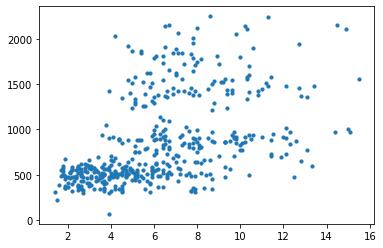

In [ ]:
##df.plot(kind='scatter', x="MLR", y="CO")

plt.scatter(x=df['CO'], y=df['VL'], s=10)
#plt.plot(x, y_pred, color='r')
plt.show()

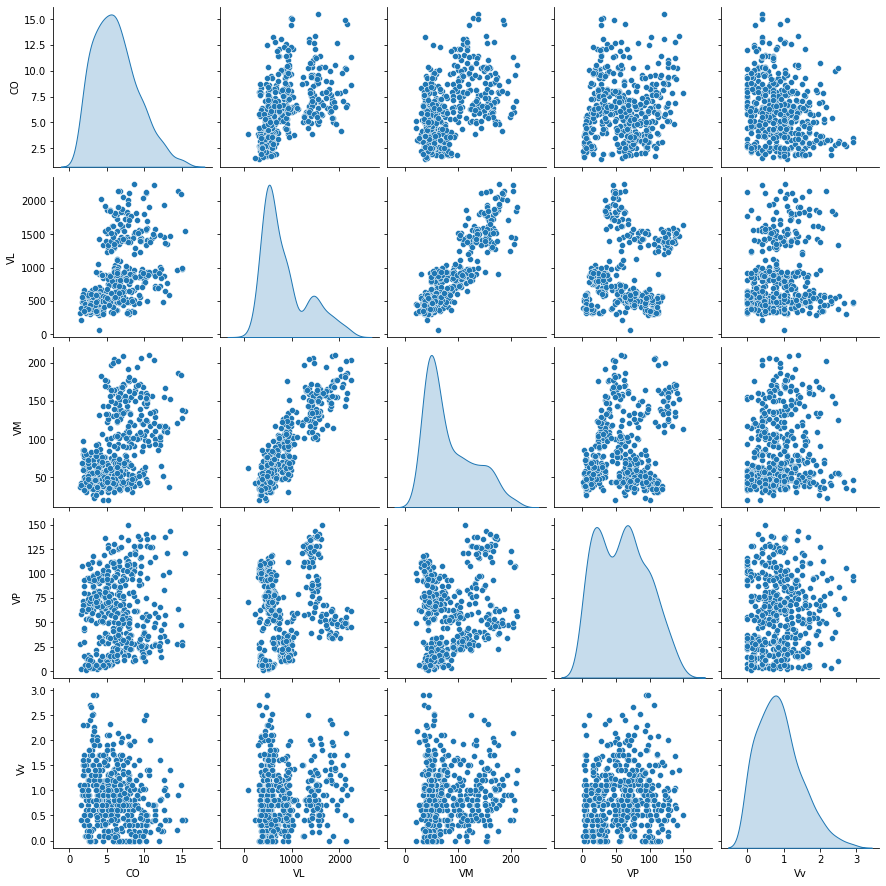

In [ ]:
sns.pairplot(df[["CO", "VL", "VM", "VP", "Vv"]], diag_kind="kde")

In [ ]:
#Agora podemos usar o pandas Dataframe para carregar os conjuntos de dados dos 'dados' e podemos alinhar os conjuntos de dados em linhas e colunas tabulares.
#Mudando para variável de quadro de dados

X_axis=pd.DataFrame(df['CO'])
print(X_axis)
Y_axis=pd.DataFrame(df['VL'])
print(Y_axis)

# X_axis = df.values[:, :-1]
# Y_axis = df.values[:, -1]
# print(X_axis)
# print(Y_axis)

      CO
0    7.1
1    5.9
2    9.6
3    7.4
4    3.7
..   ...
459  1.9
460  7.1
461  3.6
462  5.4
463  5.0

[464 rows x 1 columns]
         VL
0    1849.0
1     580.0
2    1438.0
3     651.0
4     623.0
..      ...
459   351.0
460  1423.0
461   584.0
462  1847.0
463   542.0

[464 rows x 1 columns]


In [ ]:
print(X_axis.shape)
print(Y_axis.shape)

(464, 1)
(464, 1)


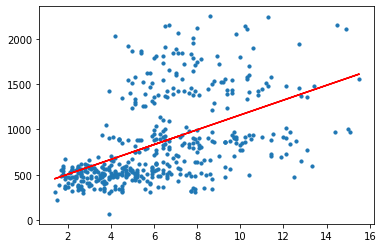

In [ ]:
#Construindo o modelo de regressão
model = LinearRegression()
model.fit(X_axis, Y_axis)
y_pred = model.predict(X_axis)

plt.scatter(X_axis, Y_axis, s=10)
plt.plot(X_axis, y_pred, color='r')
plt.show()

#print(model.predict(X_axis))


In [ ]:
#O model.coef_ fornece o coeficiente ou parâmetro da hipótese de forma que melhor se ajuste aos dados.
print(model.coef_)
#O model.intercept_ fornece o valor de interceptação da hipótese no eixo Y.
print(model.intercept_)

[[82.05969612]]
[340.0194427]


In [ ]:
#Avaliando o modelo
rms = sqrt(mean_squared_error( Y_axis,y_pred))

print(rms)


413.8834886774556


**Questão 02:** Agora faça regressão polinomial nos dados, utilizando um polinômio de grau 2. Calcule seu MSE.

Dica: Utilize a classe importada para transformar os dados para uma regressão polinomial de grau 2. Mais informações sobre como o processo podem ser encontradas dentro da pasta do projeto.

In [ ]:
x = df.values[:, :-1]
y = df.values[:, -1]

In [ ]:
print(x)
print(y)

[[1849.    209.     62.   ...  115.      4.01   30.18]
 [ 580.     48.     88.   ...   20.     17.69   13.7 ]
 [1438.    207.    108.   ...  170.      3.49   38.37]
 ...
 [ 584.     84.     71.   ...  139.     20.61    8.73]
 [1847.    156.     34.   ...   26.      4.01   30.18]
 [ 542.     43.     95.   ...  127.     20.61    8.73]]
[ 7.1  5.9  9.6  7.4  3.7  3.8 12.1  3.9  6.5  7.9  1.8  8.   5.1  6.4
  6.   8.8  3.2  7.6  4.2 10.4 10.2  7.1  4.   1.9  5.   6.5  5.7  9.5
  4.  10.1  9.7  4.2  3.6  7.4  3.9  5.1  2.2  3.7  3.2  5.5  4.2  2.1
 10.2  7.8  3.5  2.5  7.3  2.6  5.6 13.1  3.3  5.7  9.3  5.3  6.9  5.2
  5.2  2.8  3.   7.8  8.6  6.1  2.   4.7  8.1  8.6  3.4  7.   1.8  7.
 10.4  7.8  9.4  9.3  6.7  4.8  4.5  6.5  4.7  9.6  6.4 12.6 10.3  4.5
  7.6  2.5 15.1 10.   2.7  3.1  2.3  6.  13.1 12.1  2.2  5.3  5.1 12.8
  9.1  7.5  3.   6.4  3.9 13.4  7.7  4.4  4.9  8.7  2.4 12.1  6.5  5.1
  5.9  4.8  5.7  2.6  3.2  9.   6.   6.1  6.4  1.9  4.1  3.7  9.7  4.8
  9.3  9.8  2.6  5.9 10.3 

In [ ]:
polynomial_features= PolynomialFeatures(degree=2, include_bias=False)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

mse = sqrt(mean_squared_error(Y_axis, y_poly_pred))
print(mse)

print(polynomial_features.get_feature_names())
print(x_poly)

# plt.scatter(x, y, s=10)

# plt.plot(x, y_poly_pred, color='m')
# plt.show()

968.0376607329166
['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x0 x13', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x1 x13', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x2 x13', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x3 x13', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x4 x13', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x5 x13', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x6 x13', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x7 x13', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x8 x13', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x9 x13', 'x10^2',

**Questão 03:** Por fim, faça regressão polinomial utilizando um polinômio de grau 3. Verifique qual das 3 abordagens adotada produz o menor erro quadrático médio.

In [ ]:
x, y = X_axis, Y_axis

407.58877178617894
['x0', 'x0^2', 'x0^3']
[[  7.1    50.41  357.911]
 [  5.9    34.81  205.379]
 [  9.6    92.16  884.736]
 ...
 [  3.6    12.96   46.656]
 [  5.4    29.16  157.464]
 [  5.     25.    125.   ]]


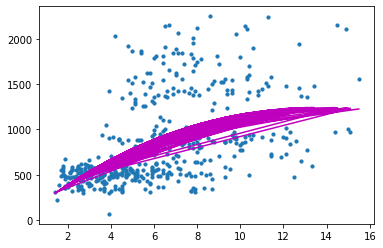

In [ ]:
polynomial_features_3= PolynomialFeatures(degree=3, include_bias=False)
x_poly3 = polynomial_features_3.fit_transform(x)

model3 = LinearRegression()
model3.fit(x_poly3, y)
y_poly_3 = model3.predict(x_poly3)

mse = sqrt(mean_squared_error(Y_axis, y_poly_3))
print(mse)

print(polynomial_features_3.get_feature_names())
print(x_poly3)

plt.scatter(x, y, s=10)

plt.plot(x, y_poly_3, color='m')
plt.show()